In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = 'Data/cleaned_data_eda.csv'

In [3]:
df = pd.read_csv(data)

I am curious if I can build a model to accurately predict price based on input features.

I also am curious to see if I can build a model to accurately predict synth_type based on input features.

## Cleaning the Data to build a Model

In [4]:
df.head()

,Unnamed: 0,Brand,Condition,Description,Model,synth_types,Price,year_made,made_in,n_keys,urls
0,0,Roland,Excellent,a previous owner added some custom knobs - see...,Boutique Series SE-02 Analog Synthesizer,Analog Synths,285.0,2010s,NaN,0,https://reverb.com/item/33250949-roland-boutiq...
1,1,Moog,Very Good,Unit is in great condition. A couple of blemis...,Sub 37 Tribute Edition,Analog Synths,975.0,2010s,United States,37 Keys,https://reverb.com/item/33250934-moog-sub-37-t...
2,2,4MS,Mint,4MS POD 48X (Powered Case) plus POWER BRICK Th...,Pod 48x Powered,Eurorack,155.0,2010s,NaN,0,https://reverb.com/item/33250878-4ms-pod-48x-p...
3,3,Dreadbox,Mint,Dreadbox Hades Bass Synthesizer Outstanding s...,Hades Bass Synthesizer,Analog Synths,560.0,2010s,Greece,0,https://reverb.com/item/33250796-dreadbox-hade...
4,4,M-Audio,Very Good,Getting rid of some things because times are t...,Axiom 49 Key USB MIDI Keyboard Controller,Controllers,55.0,2010s,NaN,49 Keys,https://reverb.com/item/33248413-m-audio-axiom...


In [5]:
# Checking for null values

df.isnull().sum()

Unnamed: 0        0
Brand             0
Condition         0
Description       0
Model             0
synth_types      84
Price             0
year_made      1534
made_in        2387
n_keys            0
urls            522
dtype: int64

In [6]:
# Checking to see the percentage of null values out of the entire dataset

100 * df.isnull().sum() / len(df)

Unnamed: 0      0.000000
Brand           0.000000
Condition       0.000000
Description     0.000000
Model           0.000000
synth_types     2.338530
Price           0.000000
year_made      42.706013
made_in        66.453229
n_keys          0.000000
urls           14.532294
dtype: float64

The missing amount for year_made is 43%, and the missing amount for made_in is 66%. Since these are such large portions of the dataset and the only way to find that data would be to search for it, and since I don't have accurate reads on the year_made feature - since they're listed as decades I'm going to remove both columns from the dataset

In [7]:
df.drop(['Unnamed: 0', 'year_made', 'made_in'], axis=1, inplace=True)

In [8]:
# The url column also isn't relevant to any model, so I will remove it.

df.drop('urls', axis=1, inplace=True)

In [9]:
# Looking at the synth_types that are null

print(len(df[df['synth_types'].isnull()]))

df[df['synth_types'].isnull()]

84


,Brand,Condition,Description,Model,synth_types,Price,n_keys
29,Korg,Mint,This Arp Odyssey sounds great and has been pla...,ARP Odyssey Rev3 37-Slim Key Duophonic Analog ...,NaN,500.00,37 Keys
108,companyofquail,Very Good,Stand to hold two of the classic elektron devi...,EIT-1 Two Tier Elektron Stand,NaN,150.00,0
133,Nord,Excellent,"Nord Electro 6D 61-Key •Perfect Condition, bar...",Electro 6D 61-Key Semi Weighted Keyboard,NaN,1500.00,0
141,Novation,Mint,Great condition. All knobs work perfectly. No ...,K station,NaN,170.00,0
217,Philips,Excellent,Philips wanted to make something different so ...,PMC-100 Composer,NaN,147.00,0
252,Lorre Mill,Mint,Here is a brand new Lorre Mill Double Knot v.2...,Double Knot v2 and Keyed Mosstone lot,NaN,900.00,0
292,Trogotronic,Excellent,The chances are that you know what this is—one...,657 Mini Mutant Analog Synth,NaN,200.00,0
313,BASTL Instruments,Mint,*Mint* condition BASTL MicroGranny 2.5 Granula...,MicroGranny v2.5 Granular Sampler UV Red,NaN,180.00,0
315,Buchla,Very Good,"Includes LEM-208, 202h, 40hp blade eurorack ad...",LEM-208 + 202h + Blade Eurorack adapter,NaN,2750.00,0
328,Yamaha,Brand New,Remie (PSS-E30) The beginning of something spe...,PSS-E30 (Remie) Mini-key Keyboard,NaN,59.99,0


In [10]:
# Building a function to try to pull synth types from the description

def synth_type_identifier(row):
    for synth_type in df.synth_types.unique():
        if re.search(str(synth_type).lower(), str(row).lower()):
            return synth_type
        else:
            pass

In [11]:
df['synth_types'].fillna(df['Description'].apply(synth_type_identifier), inplace=True)

In [12]:
df.synth_types.isnull().sum()

78

In [13]:
# I will remove all remaining null values for synth type

df.dropna(subset=['synth_types'], axis=0, inplace=True)

In [14]:
df.isnull().sum()

Brand          0
Condition      0
Description    0
Model          0
synth_types    0
Price          0
n_keys         0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3514 entries, 0 to 3591
Data columns (total 7 columns):
Brand          3514 non-null object
Condition      3514 non-null object
Description    3514 non-null object
Model          3514 non-null object
synth_types    3514 non-null object
Price          3514 non-null float64
n_keys         3514 non-null object
dtypes: float64(1), object(6)
memory usage: 219.6+ KB


## Feature Engineering

In [16]:
# Converting Brand and models to dummy variables

#df = pd.get_dummies(df, columns=['Brand'], drop_first=True)

In [17]:
# Converting Condition and synth_types to dummy variables

df = pd.get_dummies(df, columns=['Condition', 'synth_types'], drop_first=True)

In [18]:
# Converting n_keys to numeric
df['n_keys'] = df.n_keys.apply(lambda x: pd.to_numeric(x.split()[0]))

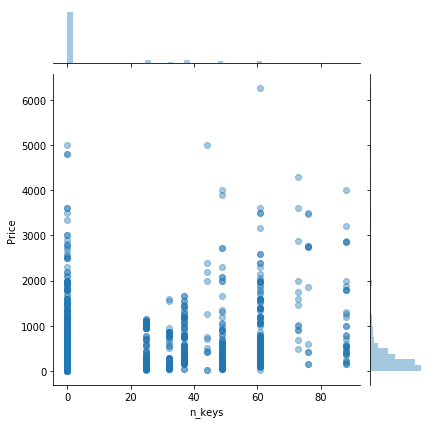

In [19]:
# Looking to see if there's any correlation between number of keys and price

sns.jointplot(x='n_keys', y='Price', data=df, alpha=0.4)

In [20]:
# Reviewing n_keys further to see if it has any significance in relation to price
import statsmodels.api as sm

X = df['n_keys']
y = df['Price']

ols_model = sm.OLS(y, sm.add_constant(X))
ols_results = ols_model.fit()

ols_results.summary()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     530.1
Date:                Mon, 04 May 2020   Prob (F-statistic):          2.26e-109
Time:                        14:31:24   Log-Likelihood:                -26511.
No. Observations:                3514   AIC:                         5.303e+04
Df Residuals:                    3512   BIC:                         5.304e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        267.8569      8.596     31.161      0.000     251.003     284.711
n_keys         9.0595      0.393     23.025      0.000       8.288       9.831
==============================================================================
Omnibus:                     3131.595   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124386.163
Skew:                           4.170   Prob(JB):                         0.00
Kurtosis:                      30.928   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Creating a new dataframe to drop Description 
new_df = df.drop(['Description', 'Model', 'Brand'], axis=1)

## Linear Regression

In [22]:
# Importing linear regression from sci-kit learn

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [23]:
# Creating features and labels variables, and splitting them into training and testing datasets

X = new_df.drop('Price', axis=1)
y = new_df['Price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
# Fitting the model and checking the R-squared score

linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
y_pred = linear_model.predict(X_test)

print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Square Error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 231.681438012
Mean Square Error: 176177.373391
Root Mean Square Error: 419.734884648


In [27]:
results = pd.DataFrame({'y_true': y_test,
                       'y_pred': y_pred})
results.head(10)

,y_pred,y_true
2471,88.346563,195.00
218,428.830773,168.00
2543,212.609041,129.99
2659,111.637441,129.99
593,230.493688,65.00
2838,111.637441,76.99
3007,267.254586,55.00
1586,230.493688,65.00
2597,852.277247,672.81
656,267.254586,235.00


In [28]:
linear_model.score(X_test, y_test)

0.18014345397199172

It looks like the model is way off here. I think this might be due to the value for n_keys not being scaled properly. Since there are a total of 10 different n_keys types, and to keep it consistent with the other features, I will make dummy values for the n_keys.

In [29]:
new_df

,Price,n_keys,Condition_Brand New,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Mint,Condition_Non Functioning,Condition_Poor,Condition_Very Good,...,synth_types_Digital Synths,synth_types_Electric Pianos,synth_types_Eurorack,synth_types_Keyboard Parts,synth_types_Modular Synths,synth_types_Organs,synth_types_Pedals,synth_types_Rackmount Synths,synth_types_Stands,synth_types_Workstations
0,285.00,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,975.00,37,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,155.00,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,560.00,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,55.00,49,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,249.00,25,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,285.00,37,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
7,54.99,25,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,370.00,37,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,95.00,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
new_df = pd.get_dummies(new_df, columns=['n_keys'], drop_first=True)

In [31]:
X = new_df.drop('Price', axis=1)
y = new_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.22180864791229737

In [33]:
y_pred = linear_model.predict(X_test)

print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Square Error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 221.469748758
Mean Square Error: 167224.021166
Root Mean Square Error: 408.930337791


In [34]:
results = pd.DataFrame({'y_true': y_test,
                       'y_pred': y_pred})
results.head(10)

,y_pred,y_true
2471,161.600943,195.00
218,457.813690,168.00
2543,205.624015,129.99
2659,111.246595,129.99
593,232.618251,65.00
2838,111.246595,76.99
3007,267.231296,55.00
1586,232.618251,65.00
2597,869.049673,672.81
656,267.231296,235.00


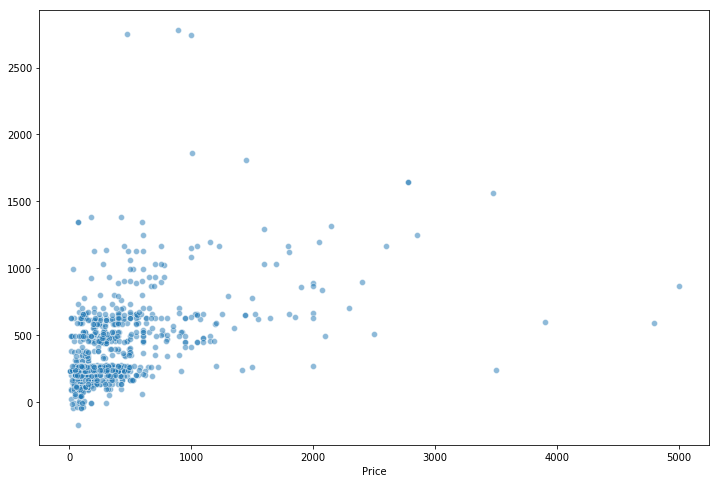

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

The negative R-squared score of the model reveals that it is not a good fit for the data. Testing to see if a polynomial linear regression will do a better job

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
polynomial_features = PolynomialFeatures(degree=2)
X_train = polynomial_features.fit_transform(X_train)
X_test = polynomial_features.transform(X_test)
    
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Square Error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 2.15267121254e+12
Mean Square Error: 3.52775279596e+26
Root Mean Square Error: 1.87823129459e+13


In [38]:
results = pd.DataFrame({'y_true': y_test,
                       'y_pred': y_pred})
results.head(10)

,y_pred,y_true
2471,291.832825,195.00
218,233.332825,168.00
2543,171.832825,129.99
2659,110.832825,129.99
593,256.582825,65.00
2838,110.832825,76.99
3007,221.832825,55.00
1586,256.582825,65.00
2597,396.332825,672.81
656,221.832825,235.00


The polynomial linear regression showed no improvements. A linear model is clearly not the right model to use in this situation. Instead I will look to use a K-Nearest Neighbors model to predict Price.

## KNN Regressor

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = new_df.drop('Price', axis=1)
y = new_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [54]:
from sklearn.neighbors import KNeighborsRegressor

# Picking the number of neighbors

for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn_model = knn.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    w = mean_squared_error(y_test, y_pred)
    print (i, w)

(1, 164066.4274388548)
(2, 80872.75636175869)
(3, 74167.32193824131)
(4, 84529.15394398007)
(5, 86019.34801781595)
(6, 78014.32774445013)
(7, 81319.82840128124)
(8, 81815.41378488945)
(9, 83141.09165749955)
(10, 83848.90089115748)
(11, 89633.2007053626)
(12, 91001.4307853286)
(13, 90477.4694734224)
(14, 93466.55021519656)
(15, 93562.07005566552)
(16, 96792.20186446908)
(17, 97565.83308911203)
(18, 101212.42350406412)
(19, 102001.8562902849)


It looks like five neighbors is the optimatal n_neighbors choice.

It seems that neither the Linear Regression model, or the KNN model does a good job of fitting the data. Since the linear model only accounts for 22% of the data's variability it appears the features I used to fit the model don't do a great job explaining the data. 

I think that the lack of Synth Brands and Models is a large reason why these models severly underfit the data. When I try to incorporate synth Brands and Models there are just too many features to create a good fitting model. In order to incorporate both I would have to create dummy variables, which would create thousands of features.

I want to test building a model on the top ten synths dataset I have to see if I can create a better model with less features.

In [41]:
top_ten = df['Brand'].value_counts()[:10].index
top_ten = df[df['Brand'].isin(top_ten)].reset_index(drop=True)

In [42]:
top_ten = pd.get_dummies(top_ten, columns=['Brand'])
top_ten.drop(['Description', 'Model'], axis=1, inplace=True)

In [43]:
X = top_ten.drop('Price', axis=1)
y = top_ten['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.3796502665395983

In [45]:
y_pred = linear_model.predict(X_test)

print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Square Error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 170.963794359
Mean Square Error: 87258.9456858
Root Mean Square Error: 295.396251983


In [57]:
# Fitting the top ten brands dataset with a KNN model to see if it does a better job

for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn_model = knn.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    w = mean_squared_error(y_test, y_pred)
    print (i, w)

(1, 164066.4274388548)
(2, 80872.75636175869)
(3, 74167.32193824131)
(4, 84529.15394398007)
(5, 86019.34801781595)
(6, 78014.32774445013)
(7, 81319.82840128124)
(8, 81815.41378488945)
(9, 83141.09165749955)
(10, 83848.90089115748)
(11, 89633.2007053626)
(12, 91001.4307853286)
(13, 90477.4694734224)
(14, 93466.55021519656)
(15, 93562.07005566552)
(16, 96792.20186446908)
(17, 97565.83308911203)
(18, 101212.42350406412)
(19, 102001.8562902849)


In [62]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, y_pred_knn)))
print('Mean Square Error: {}'.format(mean_squared_error(y_test, y_pred_knn)))
print('Root Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_knn))))
print(knn.score(X_test, y_test))

Mean Absolute Error: 124.347689162
Mean Square Error: 74167.3219382
Root Mean Square Error: 272.336780363
0.47272250387359105


When incorporating the data from the top ten most sold brands both Linear Regression and KNN R-squared scores are higher. Additionally both models do a better job at fitting the data, with a decrease in mean sqaured error, root mean squared error, and mean absolute error for both the Linear Regression, and KNN with the addition of brands.

In this case it appears the KNN model does a better job at predicting price than the Linear Regression model, however the errors are still extremely off in my opinion. With a mean absolute error of 124 dollars, and a root mean squared error of 272 dollars, for a lot of synths for sale this is too far off to warrant being used.

The R-sqaured is also low for both, with both having R-square's under 50%. 

## Deep Learning

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
model = Sequential([Dense(units=842, activation='relu'),
                   Dense(units=421, activation='relu'),
                   Dense(units=210, activation='relu'),
                   Dense(units=105, activation='relu'),
                   Dense(units=50, activation='relu'),
                   Dense(units=25, activation='relu'),
                   Dense(units=10, activation='relu')])
model.compile(optimizer='adam', loss='mse')

In [78]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [79]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[early_stop])

Train on 1139 samples, validate on 489 samples
Epoch 1/500
1139/1139 [==============================] - 1s 1ms/sample - loss: 300675.7783 - val_loss: 157029.7642
Epoch 2/500
1139/1139 [==============================] - 1s 448us/sample - loss: 224441.3679 - val_loss: 122058.8965
Epoch 3/500
1139/1139 [==============================] - 0s 423us/sample - loss: 204574.3652 - val_loss: 120587.7356
Epoch 4/500
1139/1139 [==============================] - 0s 427us/sample - loss: 200204.9474 - val_loss: 115214.4340
Epoch 5/500
1139/1139 [==============================] - 1s 476us/sample - loss: 189374.8574 - val_loss: 110013.9734
Epoch 6/500
1139/1139 [==============================] - 1s 497us/sample - loss: 180969.0644 - val_loss: 104897.0729
Epoch 7/500
1139/1139 [==============================] - 1s 476us/sample - loss: 168921.9635 - val_loss: 100289.4231
Epoch 8/500
1139/1139 [==============================] - 0s 426us/sample - loss: 157072.6796 - val_loss: 118699.7826
Epoch 9/500
1139/11

1139/1139 [==============================] - 1s 488us/sample - loss: 78920.2503 - val_loss: 91729.8358
Epoch 72/500
1139/1139 [==============================] - 1s 480us/sample - loss: 72691.1606 - val_loss: 94832.1940
Epoch 73/500
1139/1139 [==============================] - 1s 498us/sample - loss: 72366.1314 - val_loss: 90332.0618
Epoch 74/500
1139/1139 [==============================] - 1s 522us/sample - loss: 73657.0957 - val_loss: 88801.3359
Epoch 75/500
1139/1139 [==============================] - 1s 485us/sample - loss: 71828.9920 - val_loss: 91075.9732
Epoch 76/500
1139/1139 [==============================] - 1s 489us/sample - loss: 70504.6308 - val_loss: 90125.3266
Epoch 77/500
1139/1139 [==============================] - 1s 472us/sample - loss: 70717.1815 - val_loss: 89040.4991
Epoch 78/500
1139/1139 [==============================] - 1s 640us/sample - loss: 70485.4266 - val_loss: 86011.7665
Epoch 79/500
1139/1139 [==============================] - 1s 680us/sample - loss: 716